In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('data/svm_dataset_2.csv')

In [3]:
df['y'] = df['y'].map({1: 'H', -1: 'NH'})

In [4]:
df

,x1,x2,y
0,7.0,20,NH
1,8.0,12,NH
2,9.0,19,NH
3,10.0,17,NH
4,11.0,15,NH
5,13.0,14,NH
6,14.0,12,NH
7,15.0,14,NH
8,15.0,17,NH
9,16.0,16,NH


In [5]:
TEXT_OFFSET = .02

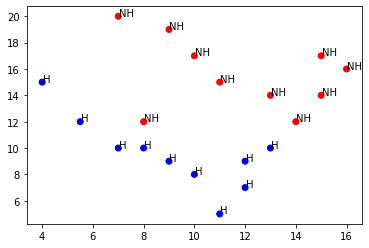

In [13]:
fig, ax = plt.subplots()
ax.scatter(df['x1'], df['x2'], c=df['y'].map({'H': 'blue', 'NH': 'red'})) 

for index, row in df.iterrows():
    ax.annotate(row[2], (row[0]+TEXT_OFFSET, row[1]+TEXT_OFFSET))

In [7]:
from sklearn.svm import SVC

In [8]:
svm = SVC(kernel='linear', C=10)

In [9]:
svm.fit(df.drop('y', axis=1), df['y'])

SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [41]:
def plot_decision_boundary(clf, X, y):
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max),np.arange(x2_min, x2_max))
    Z = clf.decision_function(np.array([xx1.ravel(), xx2.ravel()]).T).reshape(xx1.shape)
    plt.contour(xx1, xx2, Z, colors='black', levels=[-1, 0, 1], alpha=1, linestyles=['--', '-', '--'])
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

KeyError: 'X1'

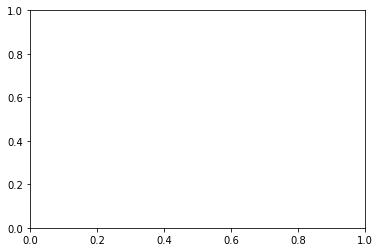

In [11]:
fig, ax = plt.subplots()
ax.scatter(df['x1'], df['x2'], c=df['y'].map({'H': 'blue', 'NH': 'red'})) 

for index, row in df.iterrows():
    ax.annotate(row[2], (row[0]+TEXT_OFFSET, row[1]+TEXT_OFFSET))
    
plot_decision_boundary(svm, df.drop('y', axis=1), df['y'])

In [ ]:
svm.n_support_

In [ ]:
svm.predict([[3, 6], [2.5, 5]])

In [ ]:
new_df = pd.read_csv('data/svm_dataset_2.csv')

In [14]:
from sklearn.datasets import make_blobs

# we create two clusters of random points
n_samples_1 = 1000
n_samples_2 = 100
centers = [[0.0, 0.0], [2.0, 2.0]]
clusters_std = [1.5, 0.5]
X, y = make_blobs(n_samples=[n_samples_1, n_samples_2],
                  centers=centers,
                  cluster_std=clusters_std,
                  random_state=0, shuffle=False)

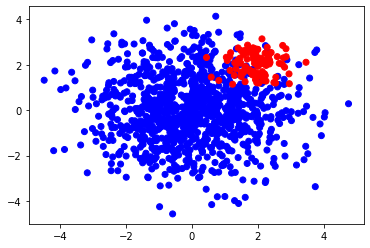

In [30]:
plt.scatter(X[:, 0], X[:, 1], color=['blue' if point == 0 else 'red' for point in y ])

In [46]:
svm_no_weight = SVC(kernel='linear')
svm_weight = SVC(kernel='linear', class_weight={0:1, 1:10})

In [47]:
svm_no_weight.fit(X, y)
svm_weight.fit(X, y)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight={0: 1, 1: 10},
    coef0=0.0, decision_function_shape='ovr', degree=3, gamma='scale',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

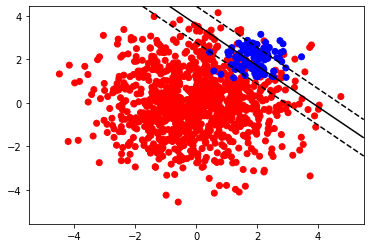

In [50]:
plot_decision_boundary(svm_no_weight, X, y)
plt.scatter(X[:, 0], X[:, 1], color=['blue' if point == 1 else 'red' for point in y ])

In [56]:
sum(svm_no_weight.predict(X[y == 1]))/ len(y[y==1])

0.59

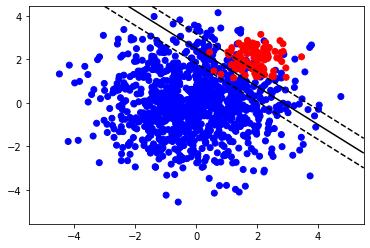

In [52]:
plot_decision_boundary(svm_weight, X, y)
plt.scatter(X[:, 0], X[:, 1], color=['blue' if point == 0 else 'red' for point in y ])

In [62]:
print(f'svm without weighting accuracy for class 1 is: {sum(svm_no_weight.predict(X[y == 1]))/ len(y[y==1])}')
print(f'svm with weighting accuracy for class 1 is: {sum(svm_weight.predict(X[y == 1]))/ len(y[y==1])}')

svm without weighting accuracy for class 1 is: 0.59
svm with weighting accuracy for class 1 is: 0.97
